<a href="https://colab.research.google.com/github/kaiquefreire05/breast-cancer-classification-machinelearning/blob/main/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas

import pickle
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
# Importando a base de dados e verificando as 5 primeiras linhas

df = pd.read_csv('/content/drive/MyDrive/datasets/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Verificando se existe valores nulos

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Verificando nome das colunas

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# Excluindo colunas desnecessárias

df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Excluindo apenas o eixo X e fazendo a modificação diretamente na base de dados

In [ ]:
# Verificando tamanho da base de dados

df.shape

(569, 31)

In [ ]:
# Fazendo a descrição da base de dados

df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
nomes_colunas = df.columns[5:11] # Pegando somente os nomes das colunas

# Convertendo a base de dados a lista

valores = []

for col in df.iloc[:,5:11].columns:
    li = df[col].tolist()
    valores.append(li)

fig = go.Figure()  # Criando a figura
for eixo_x, eixo_y in zip(nomes_colunas, valores):
        fig.add_trace(go.Box(
            y = eixo_y, # Dados colocados no eixo Y (Valores)
            name = eixo_x,  # Dados colocados no eixo X (Nomes)
            boxpoints='outliers',  #  Exibe apenas os pontos de outliers para cada gráfico de caixa.
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=3, # Define o tamanho dos marcadores para os outliers.
            line_width=2) # Linhas das figuras
        )

fig.show() # Plotando a figura

In [ ]:
# Verificando os valores únicos
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
# Quantidade de benignos e malignos
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: ylabel='diagnosis'>

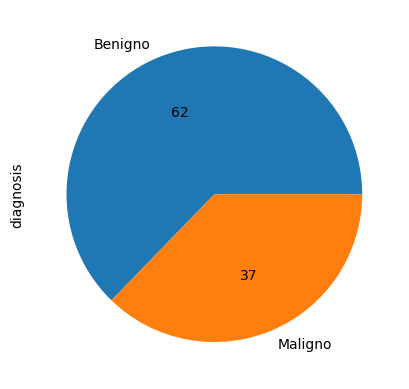

In [ ]:
# Representação em gráfico
df.diagnosis.value_counts().plot.pie(labels=['Benigno', 'Maligno'], autopct="%1d")

In [ ]:
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


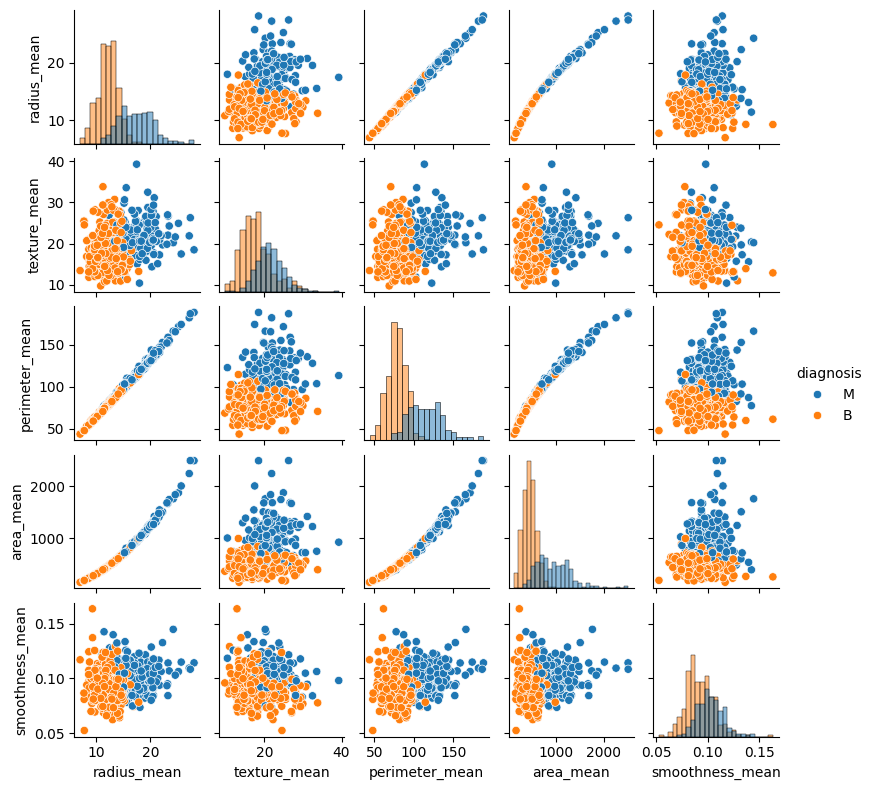

In [ ]:
# Criando gráficos de dispersão
sns.pairplot(df.iloc[:, :6], hue='diagnosis', diag_kind='hist', height=1.6)

In [ ]:
# Transformando a coluna de diagnostico em números usando o LabelEncoder

label_encoder_diagnosis = LabelEncoder()
df['diagnosis'] = label_encoder_diagnosis.fit_transform(df['diagnosis'])

In [ ]:
# Verificando se realmente está em inteiros
df['diagnosis'].value_counts()
# Maligno = 1
# Benigno = 2

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
# Fazendo a previsão entre base de treinamento e teste

x_treino, x_teste, y_treino, y_teste = train_test_split(df.iloc[:,1:], df['diagnosis'], test_size=0.20, random_state=0) # Pegando apenas 20% da base de dados

In [ ]:
print(f'O tamanho da base de dados é de: {df.shape}')
print(f'O tamanho das variáveis de treino é: {x_treino.shape, y_treino.shape}')
print(f'O tamanho das variáveis de teste é: {x_teste.shape, y_teste.shape}')

O tamanho da base de dados é de: (569, 31)
O tamanho das variáveis de treino é: ((455, 30), (455,))
O tamanho das variáveis de teste é: ((114, 30), (114,))


In [ ]:
# Fazendo o escalonamento dos valores

scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.fit_transform(x_teste)

In [ ]:
# Salvando as variáveis de treinamento e teste no formato pkl
with open('cancer.pkl', mode='wb') as f:
    pickle.dump([x_treino, y_treino, x_teste, y_teste], f)

# Naive Bayes

In [ ]:
bayes_model = GaussianNB()
bayes_model.fit(x_treino, y_treino) # Fazendo treinamento
previsoes_bayes = bayes_model.predict(x_teste)

A taxa de acurácia do algoritmo foi de 0.9385964912280702
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Matriz de confusão: 


0.9385964912280702

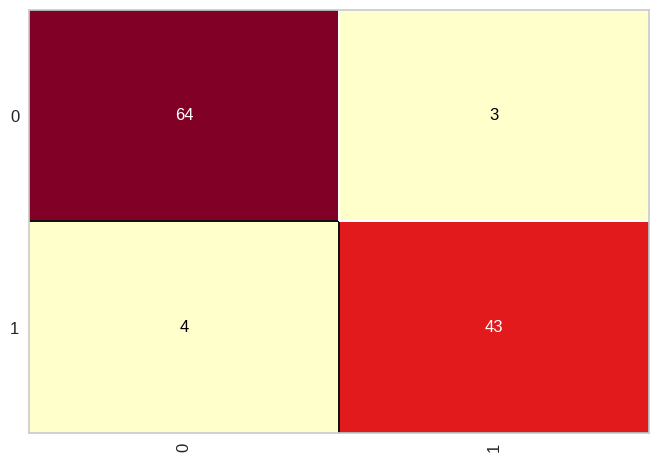

In [ ]:
# Fazendo as métricas
print(f'A taxa de acurácia do algoritmo foi de {accuracy_score(y_teste, previsoes_bayes)}')
print('=-='*20)
print(f'Relatório de classificação: \n{classification_report(y_teste, previsoes_bayes)}')
print('=-='*20)
print('Matriz de confusão: ')
cm = ConfusionMatrix(bayes_model)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

# Random Forests

In [ ]:
# gini, n_estimators=10 = 0.956140350877193
# gini, n_estimators=20 = 0.9649122807017544

# entropy, n_estimators=10 = 0.9736842105263158

In [ ]:
random_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0) # gini , entropy
random_model.fit(x_treino, y_treino)
previsoes_random = random_model.predict(x_teste)

A taxa de acurácia do algoritmo foi de 0.9736842105263158
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Matriz de confusão: 


0.9736842105263158

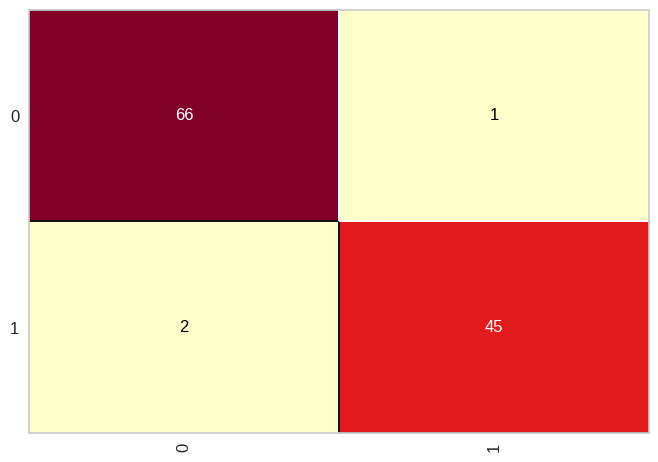

In [ ]:
# Fazendo as métricas
print(f'A taxa de acurácia do algoritmo foi de {accuracy_score(y_teste, previsoes_random)}')
print('=-='*20)
print(f'Relatório de classificação: \n{classification_report(y_teste, previsoes_random)}')
print('=-='*20)
print('Matriz de confusão: ')
cm = ConfusionMatrix(random_model)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

# Regressão logística

In [ ]:
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(x_treino, y_treino)
previsoes_logistic = logistic_model.predict(x_teste)

A taxa de acurácia do algoritmo foi de 0.956140350877193
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Matriz de confusão: 


0.956140350877193

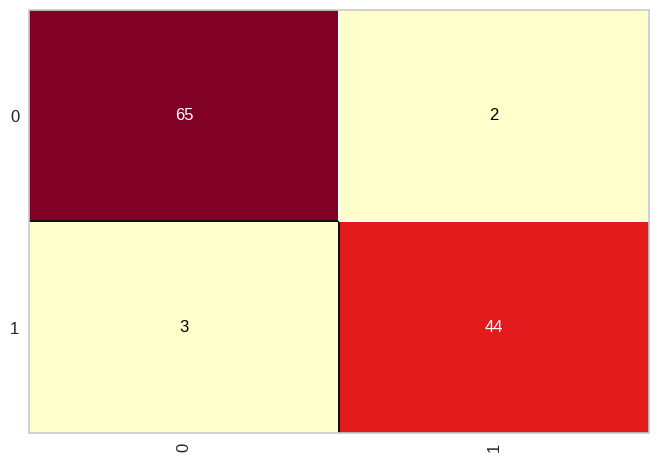

In [ ]:
# Fazendo as métricas
print(f'A taxa de acurácia do algoritmo foi de {accuracy_score(y_teste, previsoes_logistic)}')
print('=-='*20)
print(f'Relatório de classificação: \n{classification_report(y_teste, previsoes_logistic)}')
print('=-='*20)
print('Matriz de confusão: ')
cm = ConfusionMatrix(logistic_model)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

# SVM - Support Vector Machine

In [ ]:
# Criando algortimo e fazendo o treino
svm_model = SVC(kernel='rbf', random_state=0, C=1.0) # Esses parâmetros podem ser mudados
svm_model.fit(x_treino, y_treino)
previsoes_svm = svm_model.predict(x_teste)

# Kernel 'linear': 0.9736842105263158
# Kernel 'poly' (polinominal): 0.8771929824561403
# Kernel 'sigmoid'(sigmoide): 0.9122807017543859
# Kernel 'rbf' (default, tendência em ser melhor na maioria de base de dados): 0.9824561403508771

# Com kernel 'rbf' que foi melhor r C=2.0: 0.988
# Com kernel 'rbf' que foi melhor r C=3.0: 0.984


A taxa de acurácia do algoritmo foi de 0.9824561403508771
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Matriz de confusão: 


0.9824561403508771

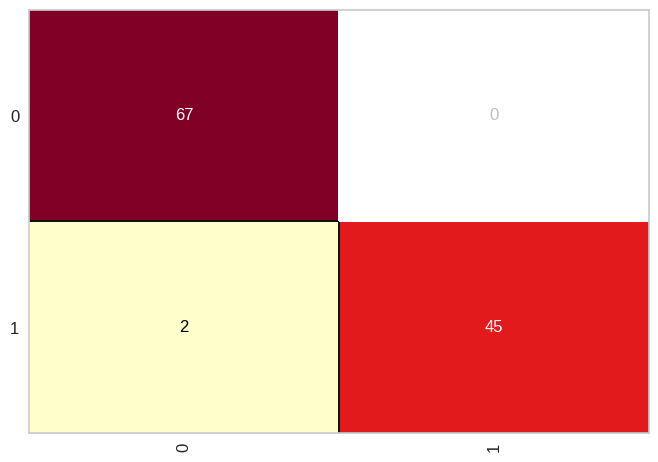

In [ ]:
# Fazendo as métricas
print(f'A taxa de acurácia do algoritmo foi de {accuracy_score(y_teste, previsoes_svm)}')
print('=-='*20)
print(f'Relatório de classificação: \n{classification_report(y_teste, previsoes_svm)}')
print('=-='*20)
print('Matriz de confusão: ')
cm = ConfusionMatrix(svm_model)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)